In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
festivales_bcn_20 = pd.read_pickle("./data/festivales_bcn_20_procesado.pkl")

In [164]:
categoricas_festivales = [
    "Ambit",
    "Titularidad",
    "NomDelFestival",
    "Mes",
    "Estacion",
    "Entrada"
]

In [165]:
categoricas_destacadas = [
    'Ambit', 
    'Titularidad', 
    'Mes', 
    'Estacion',
    "Entrada"
]

In [166]:
columnas_numericas_fests = [
    "Edicio",
    "Asistentes"
]

Funciones análisis

In [167]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    # Filtra solo las columnas que están en categoricas_destacadas
    columnas_categoricas = [col for col in columnas_categoricas if col in categoricas_destacadas]
    
    num_columnas = 2 
    num_filas = (len(columnas_categoricas) + num_columnas - 1) // num_columnas  # Calcula el número de filas necesario

    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))  # Ajusta el tamaño del subplot
    axes = axes.flatten()  # Aplanar el array de axes para un manejo más fácil

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if isinstance(df[col].iloc[0], list):  # Verificar si el elemento es una lista
            temp_df = df.explode(col)
        else:
            temp_df = df

        serie = temp_df[col].value_counts()
        if relativa:
            total = serie.sum()
            serie = serie.apply(lambda x: x / total)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            ax.set_ylabel('Frecuencia')

        # Usar la paleta 'viridis' y asignar 'x' a 'hue'
        sns.barplot(x=serie.index, y=serie, hue=serie.index, ax=ax, palette='viridis', legend=False)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')  # Ocultar ejes no utilizados

    plt.tight_layout()
    plt.show()

In [168]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [169]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

In [170]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [171]:
def variabilidad(df):
    df_var = df.describe().loc[["std", "mean"]].T
    df_var["CV"] = df_var["std"]/ df_var["mean"]
    return df_var

In [172]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [173]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

Tendencia central

In [174]:
festivales_bcn_20.describe().loc["mean"]

Edicio           16.8
Asistentes    17431.4
Name: mean, dtype: float64

In [175]:
festivales_bcn_20.describe().loc["50%"]

Edicio          11.0
Asistentes    3000.0
Name: 50%, dtype: float64

In [176]:
festivales_bcn_20.describe().loc["max"]

Edicio            52.0
Asistentes    200000.0
Name: max, dtype: float64

In [177]:
festivales_bcn_20.describe().loc["min"]

Edicio         1.0
Asistentes    40.0
Name: min, dtype: float64

In [178]:
festivales_bcn_20[categoricas_destacadas].mode().T

,0,1
Ambit,Multidisciplinaris i altres,Música
Titularidad,Privada,NaN
Mes,Octubre,NaN
Estacion,Otoño,NaN
Entrada,De Pago,NaN


Comentarios <br>
La mediana de ediciones en el aó de la pandemia baja a 11, ya que son muchos los fetsivales suspendidos este año. <br>
La mediana de asistentes es de apenas 3mil. <br>
Las modas tienen pequeños matices con respecto al 21 y 22: esta vez la música está empatada con los festivales multidisciplinares, y tienen lugar mayormente en octubre, si bien siguen siendo de pago y organizados por entidades privadas. Anteriormente había mayor oferta en junio, que este año cambia, presumiblemente por la pandemia, pero esto luego se mantiene al menos en los 2 años subsiguienes. Qué otras tendencias habrán cambiado? Cuáles cambios han sido solo momentáneos, y cuáles llegaron para quedarse?

Frecuencias relativa y absoluta

In [179]:
for catego in categoricas_destacadas:
    print(festivales_bcn_20[catego].value_counts())
    print("\n")

Ambit
Música                         6
Multidisciplinaris i altres    6
Arts visuals                   5
Audiovisuals                   4
Arts escèniques                3
Lletres                        1
Name: count, dtype: int64


Titularidad
Privada    16
Pública     9
Name: count, dtype: int64


Mes
Octubre       6
Septiembre    5
Diciembre     3
Febrero       2
Julio         2
Noviembre     2
Enero         2
Agosto        1
Junio         1
Marzo         1
Name: count, dtype: int64


Estacion
Otoño       13
Verano       7
Invierno     5
Name: count, dtype: int64


Entrada
De Pago    14
Gratis     10
Mixta       1
Name: count, dtype: int64




Comentarios <br>


In [181]:
for catego in categoricas_destacadas:
    print(festivales_bcn_20[catego].value_counts()/len(festivales_bcn_20)*100)
    print("\n")

Ambit
Música                         24.0
Multidisciplinaris i altres    24.0
Arts visuals                   20.0
Audiovisuals                   16.0
Arts escèniques                12.0
Lletres                         4.0
Name: count, dtype: float64


Titularidad
Privada    64.0
Pública    36.0
Name: count, dtype: float64


Mes
Octubre       24.0
Septiembre    20.0
Diciembre     12.0
Febrero        8.0
Julio          8.0
Noviembre      8.0
Enero          8.0
Agosto         4.0
Junio          4.0
Marzo          4.0
Name: count, dtype: float64


Estacion
Otoño       52.0
Verano      28.0
Invierno    20.0
Name: count, dtype: float64


Entrada
De Pago    56.0
Gratis     40.0
Mixta       4.0
Name: count, dtype: float64




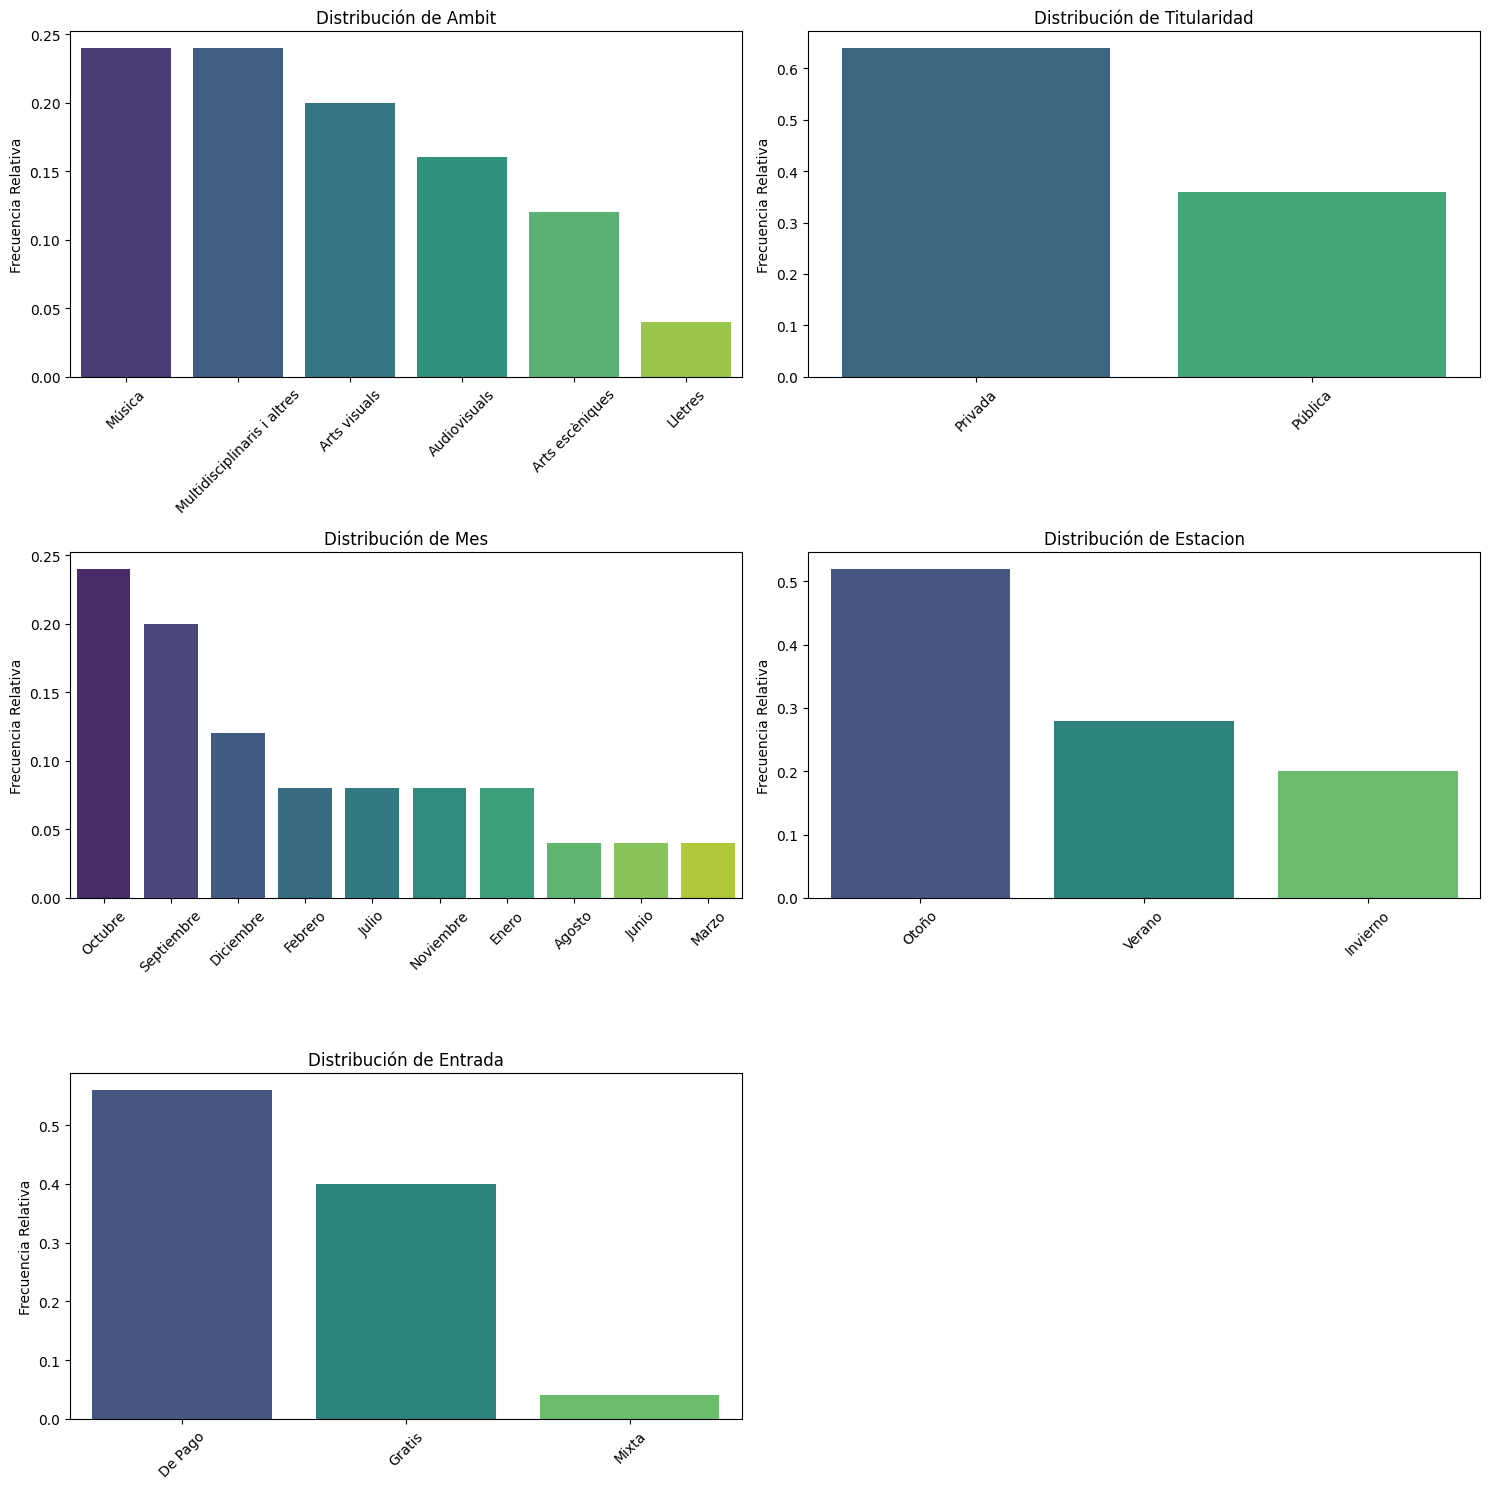

In [196]:
pinta_distribucion_categoricas(festivales_bcn_20, categoricas_destacadas, relativa = True)

Comentarios <br>
El número de propuestas del sector privado no llega a duplicar las del sector público, y los festivales de pago no superan ya por tanto margen los gratuitos. Son más las actividades gratuitas y del sector público por mantener activada la cultura, que no las privadas o con entrada, ya que los públicos han desaparecido<br>
Es el año de la pandemia, con pocas actividades ya en marzo, nada en abril y mayo, y un inicio de actividad muy tímido en junio, mes que otros años tiene la delantera. De hecho, es justamente en toda la primavera que no hay ni un solo festival, y se vuelve mucho más marcada la predominancia del otoño que ya había comenzado antes de la pandemia.Irrumpe con fuerza y de súbito la programación en diciembre.<br>
Música y escénicas están empatadas, seguidas muy de cerca por audioviduales y visuales, que se prestan mejor a un formato de distancia, menos coclectivo.

Comentarios <br>


Medidas de posición

In [182]:
festivales_bcn_20.describe()

,Edicio,Asistentes
count,25.000000,25.000000
mean,16.800000,17431.400000
std,12.672148,39728.036517
min,1.000000,40.000000
25%,8.000000,1935.000000
50%,11.000000,3000.000000
75%,24.000000,18000.000000
max,52.000000,200000.000000


In [183]:
get_IQR(festivales_bcn_20,"Edicio") 
# No es tanto mayor que la mediana (11), y casi igual que la media (mean)

16.0

In [184]:
print(festivales_bcn_20["Edicio"].quantile(0.5), "\n",
    festivales_bcn_20["Edicio"].quantile(0.9), "\n",
    festivales_bcn_20["Edicio"].quantile(0.95), "\n",
    festivales_bcn_20["Edicio"].max())

11.0 
 29.800000000000004 
 41.39999999999996 
 52.0


In [185]:
get_IQR(festivales_bcn_20,"Asistentes") 
# Sí es mucho mayor que la mediana(2120). Hay mucha dispersión. Hay que tomar con cuidado la tendencia central

16065.0

In [186]:
print(festivales_bcn_20["Asistentes"].quantile(0.5), "\n",
    festivales_bcn_20["Asistentes"].quantile(0.9), "\n",
    festivales_bcn_20["Asistentes"].quantile(0.95), "\n",
    festivales_bcn_20["Asistentes"].max())

3000.0 
 33121.60000000001 
 38502.399999999994 
 200000.0


Comentarios: <br>
Alta dispersión en el número de asistentes, marcado por una cantidad de pequeñas iniciativas, y por el desarrollo de las actividades de forma muy irregular a lo largo de este año. La mediana está en 3.000, el primer 90% en 30 mil, 10 veces más, que es la tóica del segmento más alto, con excepciones notables en el extremo, donde casi se quintuplican llegando a los 200 mil. Rompe record la diferencia entre el máximo y la mediana, unas 66 veces-


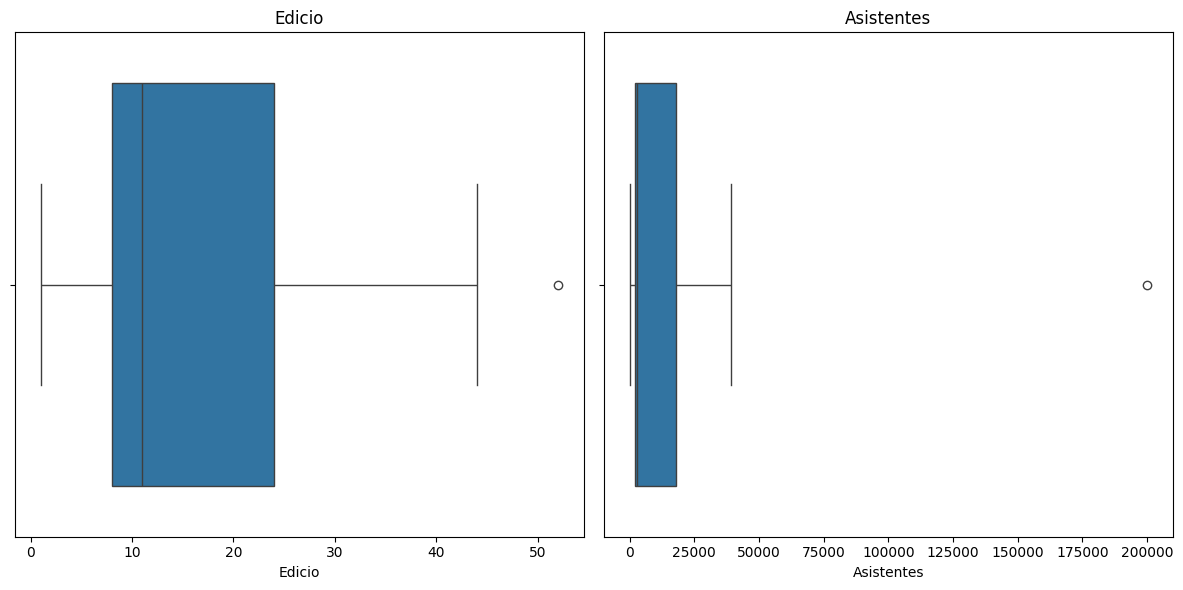

In [187]:
plot_multiple_boxplots(festivales_bcn_20, columnas_numericas_fests)

Comentarios <br>
Gracias a los boxplots podemos observar como no hay una media centrada, y además hay algún outlier en las cifras de asistentes, solo uno, pero muy alejado de los demás.

In [188]:
plot_boxplot_grouped(festivales_bcn_20, "Edicio", "Asistentes")

# Por qué no consigo que se imprima esto????

Medidas de dispersión

In [189]:
festivales_bcn_20.describe().loc[["std", "mean"]].T

,std,mean
Edicio,12.672148,16.8
Asistentes,39728.036517,17431.4


In [190]:
variabilidad(festivales_bcn_20)
# Menos 15% es baja variabilidad, entre 15 y 30 es normal, más de 30 es alta = Es decir, todos tienen una altísima variabilidad! A ver visualmente...

,std,mean,CV
Edicio,12.672148,16.8,0.754295
Asistentes,39728.036517,17431.4,2.279108


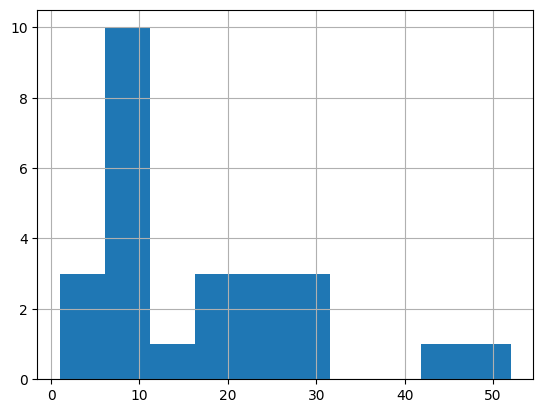

In [191]:
festivales_bcn_20["Edicio"].hist();

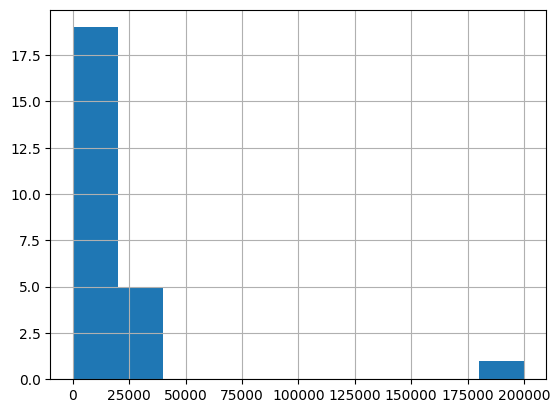

In [192]:
festivales_bcn_20["Asistentes"].hist();

Distribución

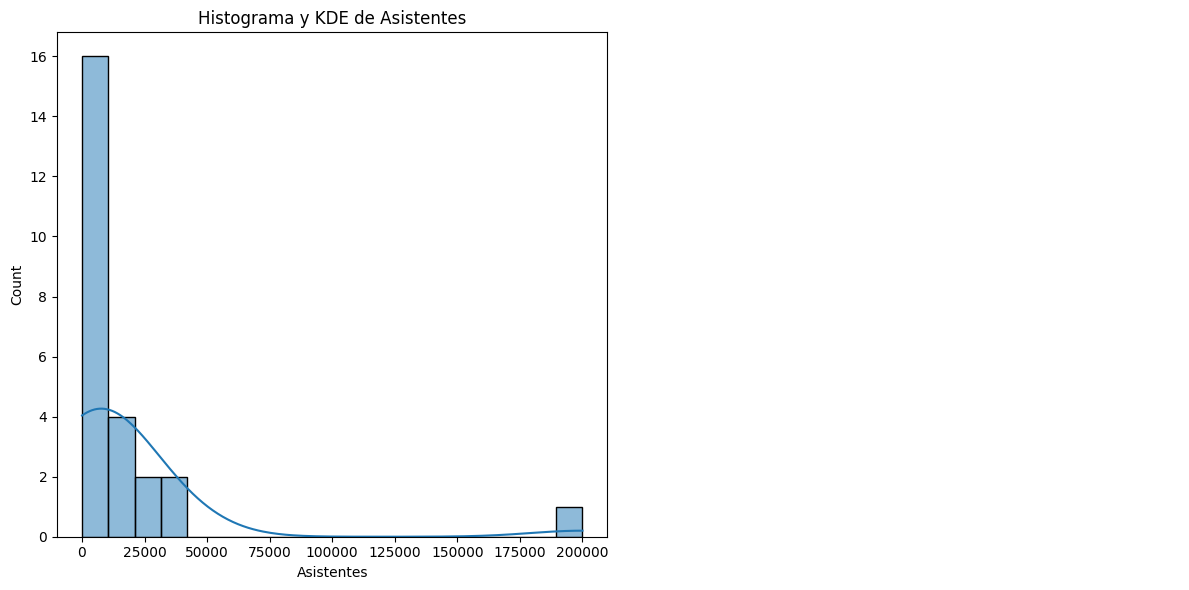

In [193]:
plot_histo_den(festivales_bcn_20, ["Asistentes"])

Anomalías outliers

(2,)


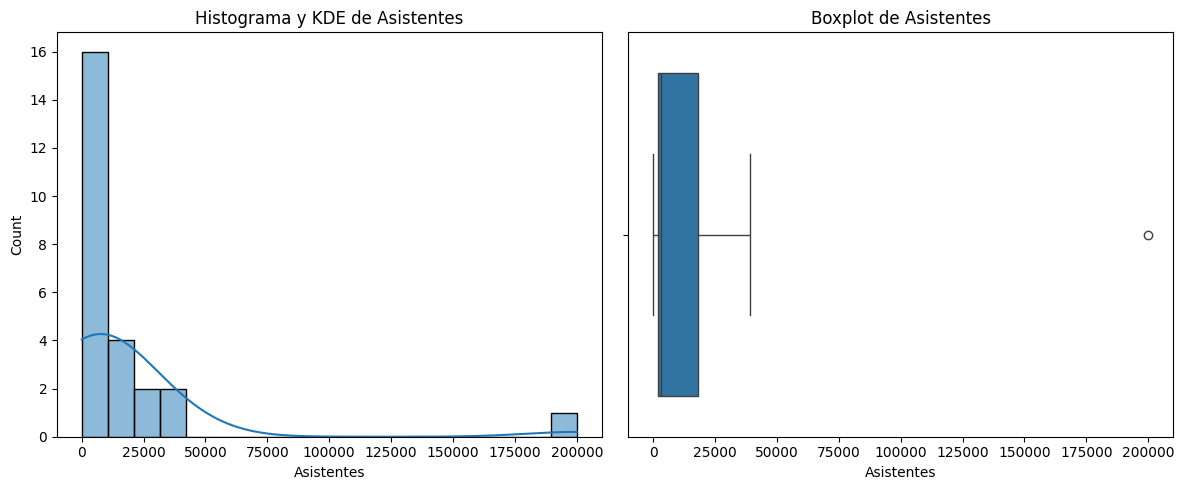

In [194]:
plot_combined_graphs(festivales_bcn_20, ["Asistentes"])

In [198]:
festivales_bcn_20 = festivales_bcn_20.sort_values('Asistentes', ascending=False)
primeros_10 = festivales_bcn_20.head(10)  
tipo_entradas_top_festivales = primeros_10['Entrada'].value_counts()

porcentaje_tipo_entradas_primeros_10 = tipo_entradas_top_festivales / tipo_entradas_top_festivales.sum() * 100

for entrada, count in tipo_entradas_top_festivales.items():
    porcentaje = porcentaje_tipo_entradas_primeros_10[entrada]
    print(f"{entrada}: {count} - {porcentaje:.2f}%")

De Pago: 5 - 50.00%
Gratis: 4 - 40.00%
Mixta: 1 - 10.00%


In [199]:
festivales_bcn_2 = festivales_bcn_20.sort_values('Asistentes', ascending=False)
primeros_10 = festivales_bcn_20.head(10)  
tipo_entradas_top_festivales = primeros_10['Ambit'].value_counts()

porcentaje_tipo_entradas_primeros_10 = tipo_entradas_top_festivales / tipo_entradas_top_festivales.sum() * 100

for entrada, count in tipo_entradas_top_festivales.items():
    porcentaje = porcentaje_tipo_entradas_primeros_10[entrada]
    print(f"{entrada}: {count} - {porcentaje:.2f}%")

Multidisciplinaris i altres: 4 - 40.00%
Música: 4 - 40.00%
Arts escèniques: 2 - 20.00%


In [197]:
festivales_bcn_20

,Ambit,Edicio,NomDelFestival,Titularidad,Mes,Estacion,Asistentes,Entrada
20,Multidisciplinaris i altres,9.0,Llum BCN,Pública,Febrero,Invierno,200000.0,Gratis
10,Multidisciplinaris i altres,1.0,Cruïlla XXS,Privada,Julio,Verano,39156.0,De Pago
18,Música,31.0,Guitar Bcn,Privada,Enero,Invierno,35888.0,De Pago
22,Arts escèniques,11.0,Mercè Arts de Carrer. MAC,Pública,Septiembre,Otoño,28972.0,Gratis
17,Arts escèniques,44.0,Grec Festival de Barcelona,Pública,Junio,Verano,23572.0,Mixta
16,Música,8.0,Festival Jardins de Pedralbes,Privada,Julio,Verano,20168.0,De Pago
6,Multidisciplinaris i altres,1.0,Barcelona Festival de Nadal,Pública,Diciembre,Otoño,18000.0,Gratis
5,Multidisciplinaris i altres,7.0,Barcelona Districte Cultural,Pública,Febrero,Invierno,13371.0,Gratis
25,Música,52.0,Voll-Damm Festival de Jazz de Barcelona,Privada,Octubre,Otoño,12423.0,De Pago
24,Música,11.0,MUTEK Barcelona,Privada,Marzo,Invierno,7800.0,De Pago
